In [1]:
import yaml
from google.colab import files

# Upload the file "data.yaml" from your local PC to Google Colab
uploaded = files.upload()

# Get the filename from the uploaded dictionary
file_name = list(uploaded.keys())[0]

print("Uploaded file name:", file_name)

Saving Object-Detection.v12i.yolov8.zip to Object-Detection.v12i.yolov8.zip
Uploaded file name: Object-Detection.v12i.yolov8.zip


In [ ]:
file_name='Object-Detection.v11i.yolov8.zip'

In [2]:
def setting():
  import locale
  #print(locale.getpreferredencoding())

  def getpreferredencoding(do_setlocale = True):
      return "UTF-8"
  locale.getpreferredencoding = getpreferredencoding


import os
import zipfile

#file_name=''
if(file_name == ''):
  file_name = 'ProjectTest.v9i.yolov8.zip'
# Get the current working directory
current_directory = os.getcwd()
print("Current directory:", current_directory)

# Path to the ZIP file
zip_file_path = '/content/'+file_name

# Extract the contents of the ZIP file to a folder with the same name
output_folder = os.path.splitext(os.path.basename(zip_file_path))[0]
output_folder_path = os.path.join(current_directory, output_folder)

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Extract the contents of the ZIP file into the output folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_folder_path)

print("Files extracted to:", output_folder_path)



Current directory: /content
Files extracted to: /content/Object-Detection.v12i.yolov8


In [3]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/201.2 GB disk)


In [ ]:
!pwd #get the location
!yolo train model=yolov8n.pt data=/content/minimap.v2i.yolov8/data.yaml epochs=25 imgsz=640

In [ ]:
#output_folder_path = '/content/ProjectTest.v9i.yolov8'
from ultralytics import YOLO
#max free imgsz=1620

model = YOLO("yolov8n.pt")
results = model.train(data=f'{output_folder_path}/data.yaml', epochs=20, imgsz=640)


100%|██████████| 6.23M/6.23M [00:00<00:00, 182MB/s]


Ultralytics YOLOv8.1.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Object-Detection.v12i.yolov8/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 755k/755k [00:00<00:00, 39.9MB/s]


Overriding model.yaml nc=80 with nc=20

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/Object-Detection.v12i.yolov8/train/labels... 93 images, 6 backgrounds, 0 corrupt: 100%|██████████| 93/93 [00:00<00:00, 988.10it/s]

train: New cache created: /content/Object-Detection.v12i.yolov8/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Object-Detection.v12i.yolov8/valid/labels... 31 images, 3 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<00:00, 696.85it/s]

val: New cache created: /content/Object-Detection.v12i.yolov8/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000417, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


In [ ]:
setting()
!yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt' conf=0.25 source='/content/Object-Detection.v12i.yolov8/test/images' save=True save_txt=True

Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3009548 parameters, 0 gradients, 8.1 GFLOPs

image 1/16 /content/Object-Detection.v12i.yolov8/test/images/2427_png.rf.c0fc2b1995e462c65535c8939833cef5.jpg: 1152x2016 1 BattleOfSeaChangeSize, 1 BattleOfSeaExit, 2 BattleOfSeaWindows, 1 ConfirmToBotQuestion, 1 MyShip, 1 TextFieldToBotQuestion, 1 chatButton, 1 fireDisabled, 1 island, 1 map, 1 ocrText, 119.0ms
image 2/16 /content/Object-Detection.v12i.yolov8/test/images/2644_png.rf.93ef1c73aa5354aab47aa02332ef0f05.jpg: 1152x2016 1 BattleOfSeaChangeSize, 1 BattleOfSeaExit, 2 BattleOfSeaWindows, 1 CenterMyBoat, 1 ConfirmToBotQuestion, 1 MyShip, 1 TextFieldToBotQuestion, 1 chatButton, 1 fireDisabled, 1 ocrText, 7.3ms
image 3/16 /content/Object-Detection.v12i.yolov8/test/images/3162_png.rf.d9b09f590dbeb1094ce59bd8d0bea2c8.jpg: 1152x2016 1 BattleOfSeaChangeSize, 1 BattleOfSeaExit, 2 BattleOfSeaWindows, 1 ConfirmT

In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model
model = YOLO('/content/runs/detect/train2/weights/best.pt')

# Specify the source image
source = '/content/screenshot*.png'

# Make predictions
results = model.predict(source, save=True, imgsz=300, conf=0.2)

boxes = results[0].boxes.xyxy.cpu()
clss = results[0].boxes.cls.cpu().tolist()
Dictionary = results[0].names
# Extract bounding box dimensions
boxes = results[0].boxes.xywh.cpu()
for box,cls in zip(boxes,clss):
    print("***********")
    x, y, w, h = box
    #print(f"x={x}, y={y} and Width of Box:  w={w}, Height of Box: h={h}")
    print(f"cls={cls}->{Dictionary[cls]}")



WARNING ⚠️ imgsz=[300] must be multiple of max stride 32, updating to [320]
image 1/1 /content/screenshot1.png: 192x320 1 Number4, 1 Number5, 1 Number7, 1 Number8, 15.9ms
Speed: 0.9ms preprocess, 15.9ms inference, 2.1ms postprocess per image at shape (1, 3, 192, 320)
Results saved to runs/detect/predict4
***********
cls=6.0->Number7
***********
cls=7.0->Number8
***********
cls=4.0->Number5
***********
cls=3.0->Number4


In [ ]:
def getText(screenshot_array_format,modelOCR=YOLO('/content/runs/detect/train2/weights/best.pt')):
    results = modelOCR.predict(screenshot_array_format,imgsz=640, conf=0.2)
    boxes = results[0].boxes.xyxy.cpu()
    clss = results[0].boxes.cls.cpu().tolist()
    Dictionary = results[0].names
    mapping = {}
    for box, cls in zip(boxes, clss):
        mapping[box[0]] = Dictionary[cls][-1]
        #print(f"box={box[0]}, cls={cls}->{Dictionary[cls]}")

    sorted_dict = {k: v for k, v in sorted(mapping.items(), key=lambda item: item[0])}
    string=''
    for value in sorted_dict.values():
        string=string+value
    return string


getText(source)


image 1/1 /content/screenshot1.png: 384x640 1 Number4, 1 Number5, 1 Number7, 1 Number8, 55.3ms
Speed: 1.2ms preprocess, 55.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


'5874'

In [ ]:
for result in results:
    print(results.index)
    for i, box in enumerate(result.boxes.xyxy):
        print("Bounding box:", box)

        # Extract coordinates of the detected object's bounding box
        x1, y1, x2, y2 = box[:4]
        print("Bounding box coordinates:", x1, y1, x2, y2)

        # Access the class label for the bounding box
        class_label = result.names[i]
        print("Class:", class_label)



<built-in method index of list object at 0x7a656b535bc0>
Bounding box: tensor([48.8191, 11.1394, 59.1070, 29.7945], device='cuda:0')
Bounding box coordinates: tensor(48.8191, device='cuda:0') tensor(11.1394, device='cuda:0') tensor(59.1070, device='cuda:0') tensor(29.7945, device='cuda:0')
Class: Number1
Bounding box: tensor([35.1990, 11.6475, 46.1495, 29.9655], device='cuda:0')
Bounding box coordinates: tensor(35.1990, device='cuda:0') tensor(11.6475, device='cuda:0') tensor(46.1495, device='cuda:0') tensor(29.9655, device='cuda:0')
Class: Number2
Bounding box: tensor([20.8811, 14.5520, 32.1943, 33.3263], device='cuda:0')
Bounding box coordinates: tensor(20.8811, device='cuda:0') tensor(14.5520, device='cuda:0') tensor(32.1943, device='cuda:0') tensor(33.3263, device='cuda:0')
Class: Number3
Bounding box: tensor([60.8163, 14.5301, 71.7158, 33.1125], device='cuda:0')
Bounding box coordinates: tensor(60.8163, device='cuda:0') tensor(14.5301, device='cuda:0') tensor(71.7158, device='cuda

AttributeError: 'Results' object has no attribute 'image'. See valid attributes below.

    A class for storing and manipulating inference results.

    Attributes:
        orig_img (numpy.ndarray): Original image as a numpy array.
        orig_shape (tuple): Original image shape in (height, width) format.
        boxes (Boxes, optional): Object containing detection bounding boxes.
        masks (Masks, optional): Object containing detection masks.
        probs (Probs, optional): Object containing class probabilities for classification tasks.
        keypoints (Keypoints, optional): Object containing detected keypoints for each object.
        speed (dict): Dictionary of preprocess, inference, and postprocess speeds (ms/image).
        names (dict): Dictionary of class names.
        path (str): Path to the image file.

    Methods:
        update(boxes=None, masks=None, probs=None, obb=None): Updates object attributes with new detection results.
        cpu(): Returns a copy of the Results object with all tensors on CPU memory.
        numpy(): Returns a copy of the Results object with all tensors as numpy arrays.
        cuda(): Returns a copy of the Results object with all tensors on GPU memory.
        to(*args, **kwargs): Returns a copy of the Results object with tensors on a specified device and dtype.
        new(): Returns a new Results object with the same image, path, and names.
        plot(...): Plots detection results on an input image, returning an annotated image.
        show(): Show annotated results to screen.
        save(filename): Save annotated results to file.
        verbose(): Returns a log string for each task, detailing detections and classifications.
        save_txt(txt_file, save_conf=False): Saves detection results to a text file.
        save_crop(save_dir, file_name=Path("im.jpg")): Saves cropped detection images.
        tojson(normalize=False): Converts detection results to JSON format.
    

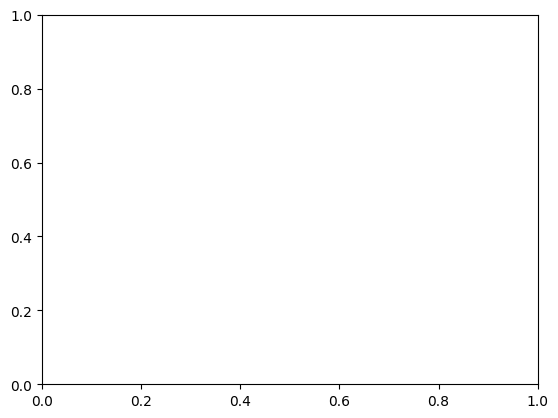

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_boxes_and_save(results, output_dir):
    for i, result in enumerate(results):
        # Create a new figure
        fig, ax = plt.subplots()

        # Plot the image (assuming it's already loaded)
        # Replace 'result.image' with the actual image data if available
        ax.imshow(result.image)

        # Plot each bounding box
        for box, name in zip(result.boxes.xyxy, result.names):
            x1, y1, x2, y2 = box[:4]
            width = x2 - x1
            height = y2 - y1

            # Create a rectangle patch
            rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='r', facecolor='none')

            # Add the rectangle patch to the Axes
            ax.add_patch(rect)

            # Add class label as text
            ax.text(x1, y1, name, color='r', verticalalignment='top')

        # Set axis off
        ax.axis('off')

        # Save the figure as PNG
        plt.savefig(f'{output_dir}/box_{i}.png', bbox_inches='tight', pad_inches=0)

        # Close the figure to release memory
        plt.close()

# Example usage:
results = results  # Replace "your_results_list" with your actual results object
output_dir = '/content/plots'  # Directory to save the plots

# Call the function to plot boxes and save as PNG
plot_boxes_and_save(results, output_dir)


In [ ]:
import zipfile
import os

def zip_folder(folder_path, output_path):
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(folder_path):
            for file in files:
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), os.path.join(folder_path, '..')))

folder_path = '/content/runs/detect/train2'  # Path to the folder you want to download
output_path = '/content/detect.zip'   # Path for the output zip file
zip_folder(folder_path, output_path)

from google.colab import files

files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for i in result.boxes.xyxy:
  print(i)

tensor([1890.1628,   53.4809, 1919.3049,  345.0317], device='cuda:0')
tensor([1303.2501, 1043.6565, 1326.8184, 1066.8275], device='cuda:0')
tensor([1893.2651,   85.3783, 1919.2351,  425.8147], device='cuda:0')
tensor([1039.0553, 1043.8749, 1063.3949, 1066.4382], device='cuda:0')
